# Visualizing CIFAR100 Class Partitioning with Flower

This notebook demonstrates how the Flower framework partitions the CIFAR100 dataset into multiple clients using the IID (Independent and Identically Distributed) partitioner. The bar chart below shows the distribution of coarse labels (superclasses) across each partition, helping to visualize the balance and allocation of data among clients.

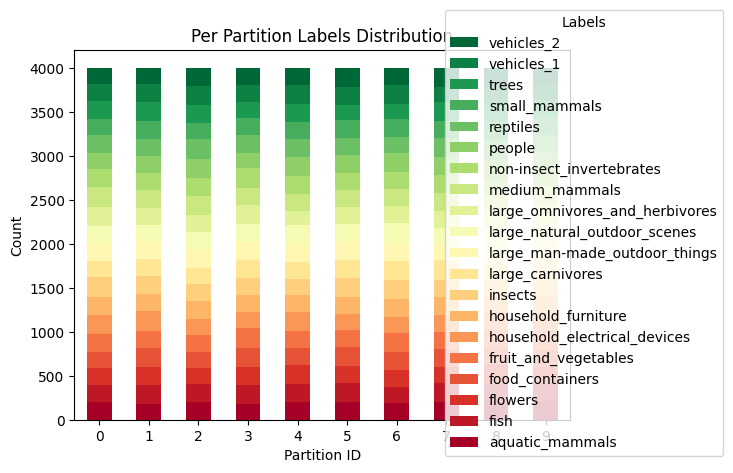

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import IidPartitioner
from flwr_datasets.preprocessor import Divider
from flwr_datasets.visualization import plot_label_distributions

# You can vary the partitioner to see the effects
partitioner = IidPartitioner(num_partitions=10)

fds = FederatedDataset(
    dataset="uoft-cs/cifar100",
    partitioners={"train": partitioner},
)

partitioner = fds.partitioners["train"]

# for each sample, the CIFAR-100 offer three fields: img (for the image obj), fine_label (100 labels) and coarse_label (20 labels)
fig, ax, df = plot_label_distributions(
    partitioner,
    label_name="coarse_label",  # here coarse_label is set instead of fine_label to better visualize the partitioner at work
    plot_type="bar",
    size_unit="absolute",
    partition_id_axis="x",
    legend=True,
    verbose_labels=True,
    title="Per Partition Labels Distribution",
)